# Tạo DataFrame dùng cho việc phân tích dữ liệu facebook fanpage

In [577]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open("data.json", encoding="utf8") as jf:
    data = json.load(jf)

urls = []
created_ats = []
contents = []
comment_counts = []

hahas = []
likes = []
sads = []
loves = []
cares = []
wows = []
angries = []

share_counts = []
REACTIONS = ['Like', 'Haha', 'Love', 'Sad', 'Care', 'Wow', 'Angry']

for post in data:
    try:
        urls.append(post.get("url"))
        created_ats.append(int(post.get("created_at")))
        contents.append(post.get("content"))
        comment_counts.append(int(post.get("comment_count", 0)))
        share_counts.append(int(post.get("share_count", 0)))

        reaction_dict = {
            name: 0
            for name in REACTIONS
        }

        reactions = {
            d["name"]: d["count"]
            for d in post["reactions"]
        }

        for k, v in reactions.items():
            reaction_dict[k] += v

        likes.append(reaction_dict["Like"])
        hahas.append(reaction_dict["Haha"])
        loves.append(reaction_dict["Love"])
        sads.append(reaction_dict["Sad"])
        cares.append(reaction_dict["Care"])
        wows.append(reaction_dict["Wow"])
        angries.append(reaction_dict["Angry"])

    except Exception:
        ...

header = ['url',
          'created_at',
          'content',
          'comment_count',
          'hahas',
          'likes',
          'sads',
          'loves',
          'cares',
          'wows',
          'angries',
          'share_count']

values = [urls,
          created_ats,
          contents,
          comment_counts,
          hahas,
          likes,
          sads,
          loves,
          cares,
          wows,
          angries,
          share_counts]

df = pd.DataFrame(dict(zip(header, values)))
df.to_csv("fb_data.csv", index=False, encoding="utf-8-sig")
df

,url,created_at,content,comment_count,hahas,likes,sads,loves,cares,wows,angries,share_count
0,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701529381,[Series] Review trải nghiệm yêu đương với Ma Kết,4293,1655,4245,172,738,49,19,3,523
1,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701440072,[Series] Review trải nghiệm yêu đương với Bạch...,4769,1958,4450,705,239,39,31,5,581
2,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701360557,T tưởng t ra BTVN rồi bây nộp pài á bây ơi,173,9684,4280,2019,63,16,16,0,65
3,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701358586,Drama “Mình tính không bằng người ta tính (Phầ...,234,1807,1495,69,58,8,3,2,85
4,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701350870,Mê cái cách họ tiêu tiền :)))\n#zodiac #xalozo...,434,2807,2200,788,77,12,3,0,117
...,...,...,...,...,...,...,...,...,...,...,...,...
93,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698503029,Khoái quá tr khoái r =)))\n#thienbinh\n#zodiac...,601,4327,2755,46,876,84,10,0,187
94,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698411689,Xa Lộ English tuyển dụng 2 vị trí:\n Giáo viên...,5,0,172,0,45,0,0,0,16
95,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698333072,Tác giả thích bao nhiuu kịch bản \n#songngu\n#...,508,3126,1805,818,72,9,6,1,218
96,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698329590,Để chửi đứa khác \n#nhanma\n#zodiac\n-----\nKrin,570,4452,2178,604,65,14,10,0,143


# Lấy ra thông tin của page

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            98 non-null     object
 1   created_at     98 non-null     int64 
 2   content        98 non-null     object
 3   comment_count  98 non-null     int64 
 4   hahas          98 non-null     int64 
 5   likes          98 non-null     int64 
 6   sads           98 non-null     int64 
 7   loves          98 non-null     int64 
 8   cares          98 non-null     int64 
 9   wows           98 non-null     int64 
 10  angries        98 non-null     int64 
 11  share_count    98 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 9.3+ KB


In [579]:
df['total_reactions'] = df['hahas'] + df['likes'] + df['sads'] + df['loves'] + df['cares'] + df['wows'] + df['angries']

In [580]:
df['total_interactions'] = df['total_reactions'] + df['comment_count'] + df['share_count']

In [581]:
sum(df['hahas'])

381366

In [582]:
sum(df['likes'])

406085

In [583]:
sum(df['loves'])

68683

In [584]:
sum(df['wows'])

2652

In [585]:
sum(df['cares'])

4982

In [586]:
sum(df['angries'])

254

In [587]:
sum(df['comment_count'])

162710

In [588]:
sum(df['share_count'])

46254

In [589]:
average_reactions = df['total_reactions'].mean()
average_comments = df['comment_count'].mean()
average_shares = df['share_count'].mean()

In [590]:
average_reactions

9882.816326530612

In [591]:
average_comments

1660.3061224489795

In [592]:
average_shares

471.9795918367347

# 5 bài viết có số lượng thả cảm xúc nhiều nhất

In [593]:
# 5 bài viết có số lượng tương tác nhiều nhất
df.sort_values("total_reactions", ascending=False).head()


,url,created_at,content,comment_count,hahas,likes,sads,loves,cares,wows,angries,share_count,total_reactions,total_interactions
45,https://www.facebook.com/xalo.zodiac/posts/pfb...,1700106883,Nước x Lửa: Overthinking gặp Overvôtư\n#trasua...,4961,11538,8471,4893,194,49,43,6,1136,25194,31291
81,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698852911,Chúc mừng sinh nhật cung Bọ Cạp \n#bocap\n#zod...,4941,2215,7828,101,11554,529,21,3,3859,22251,31051
89,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698593319,"Bạn sẽ không bao giờ thấy được vẻ nũng nịu, nh...",4500,8347,8865,1971,450,94,83,4,967,19814,25281
25,https://www.facebook.com/xalo.zodiac/posts/pfb...,1700806501,"Mấy nhõ trội Khí, Lửa trọng bạn khinh sắc \n#t...",2856,11086,6407,1807,208,40,26,0,434,19574,22864
10,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701169547,"Bọ Cạp, Kim Ngưu, Song Ngư, Sư Tử 24/7:\n#tras...",1953,9077,6693,2974,193,35,45,4,561,19021,21535


# 5 posts có số comment nhiều nhất

In [594]:
df.sort_values("comment_count", ascending=False).head()

,url,created_at,content,comment_count,hahas,likes,sads,loves,cares,wows,angries,share_count,total_reactions,total_interactions
11,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701097782,[Series] Review trải nghiệm yêu đương với Xử Nữ,6618,2389,5569,1159,245,51,31,6,746,9450,16814
92,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698510379,Cung hoàng đạo nào là liều thuốc chữa lành cho...,5985,188,8175,59,3652,140,14,0,645,12228,18858
26,https://www.facebook.com/xalo.zodiac/posts/pfb...,1700756787,[Series] Review trải nghiệm yêu đương với Thiê...,5635,2597,5736,1150,260,55,38,5,607,9841,16083
45,https://www.facebook.com/xalo.zodiac/posts/pfb...,1700106883,Nước x Lửa: Overthinking gặp Overvôtư\n#trasua...,4961,11538,8471,4893,194,49,43,6,1136,25194,31291
81,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698852911,Chúc mừng sinh nhật cung Bọ Cạp \n#bocap\n#zod...,4941,2215,7828,101,11554,529,21,3,3859,22251,31051


# 5 post có số share nhiều nhất

In [595]:

df.sort_values("share_count", ascending=False).head()

,url,created_at,content,comment_count,hahas,likes,sads,loves,cares,wows,angries,share_count,total_reactions,total_interactions
81,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698852911,Chúc mừng sinh nhật cung Bọ Cạp \n#bocap\n#zod...,4941,2215,7828,101,11554,529,21,3,3859,22251,31051
90,https://www.facebook.com/xalo.zodiac/posts/pfb...,1698588365,Thông điệp tuần mới cho 12 cung hoàng đạo \n--...,653,20,9936,82,6443,145,16,1,3153,16643,20449
12,https://www.facebook.com/xalo.zodiac/posts/pfb...,1701090863,Thông điệp tuần mới cho 12 cung hoàng đạo \n--...,714,61,7970,75,5208,135,8,1,2962,13458,17134
55,https://www.facebook.com/xalo.zodiac/posts/pfb...,1699797604,Thông điệp tuần mới cho 12 cung hoàng đạo \n--...,449,14,8440,52,4838,113,8,1,2682,13466,16597
69,https://www.facebook.com/xalo.zodiac/posts/pfb...,1699202412,Thông điệp tuần mới cho 12 cung hoàng đạo \n--...,464,49,9841,82,5993,145,7,1,2586,16118,19168


# Thống kê tương tác

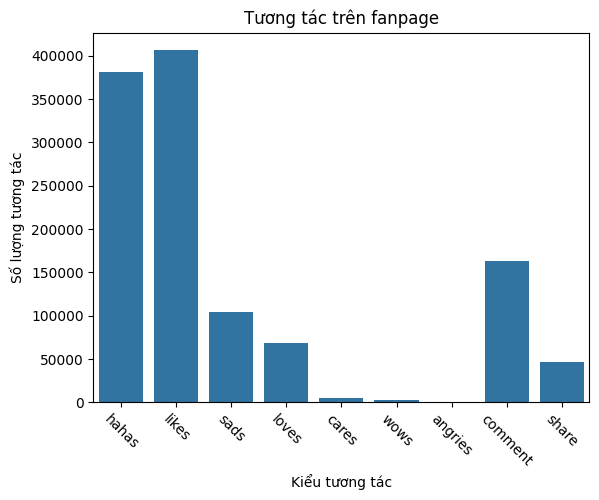

In [596]:
reactions = {
    'hahas': sum(df['hahas']),
    'likes': sum(df['likes']),
    'sads': sum(df['sads']),
    'loves': sum(df['loves']),
    'cares': sum(df['cares']),
    'wows': sum(df['wows']),
    'angries': sum(df['angries']),
    'comment': sum(df['comment_count']),
    'share' : sum(df['share_count'])
}

# Vẽ biểu dồ thống kê tương tác
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Tương tác trên fanpage")
ax.set_ylabel("Số lượng tương tác")
ax.set_xlabel("Kiểu tương tác")
plt.xticks(rotation=-45)
plt.show()

In [597]:
average_reactions = df['total_reactions'].mean()
average_comments = df['comment_count'].mean()
average_shares = df['share_count'].mean()

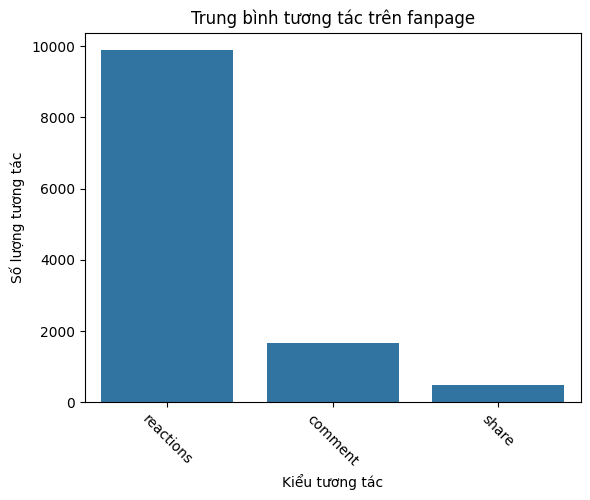

In [598]:
avg_interactions = {
    'reactions': average_reactions,
    'comment': average_comments,
    'share' : average_shares
}

# Vẽ biểu dồ thống kê tương tác
fig, ax = plt.subplots()
ax = sns.barplot(x=list(avg_interactions.keys()), y=list(avg_interactions.values()))
ax.set_title("Trung bình tương tác trên fanpage")
ax.set_ylabel("Số lượng tương tác")
ax.set_xlabel("Kiểu tương tác")
plt.xticks(rotation=-45)
plt.show()

# Mối quan hệ giữa Reactions và Bình Luận

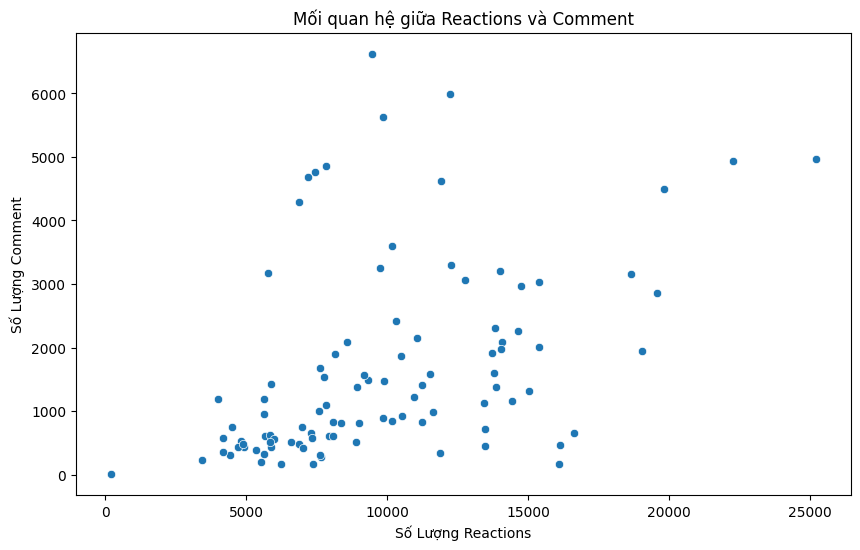

In [599]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_reactions', y='comment_count')
plt.title('Mối quan hệ giữa Reactions và Comment')
plt.xlabel('Số Lượng Reactions')
plt.ylabel('Số Lượng Comment')
plt.show()

# Thời gian đăng bài

      count
hour       
1         1
2         1
3         3
4         3
5         2
6         1
7         1
8         2
9         4
11        8
12       12
13       12
14       21
15       15
16       10
17        2


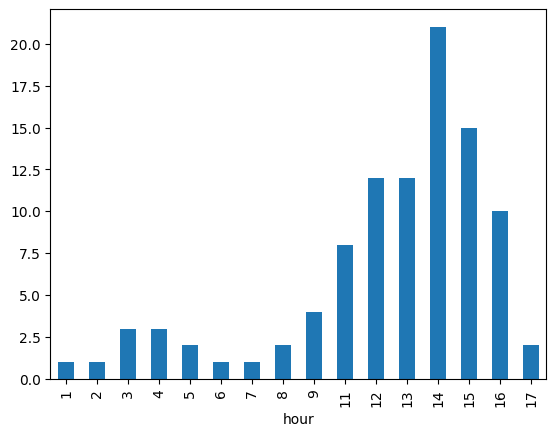

In [600]:
new_df = pd.DataFrame(df, columns=['created_at']) 

# Chuyển đổi cột created_at về định dạng datetime
new_df['created_at'] = pd.to_datetime(new_df['created_at'], errors='coerce', unit='s')

new_df["hour"] = new_df["created_at"].dt.hour

resp = new_df.groupby(by=["hour"]).count().reset_index().rename(columns={"created_at": "count"})
resp.set_index("hour", inplace=True)

print(resp)
resp["count"].plot(kind='bar')
plt.show()

# Số lượng bài viết mỗi ngày

            count
day              
2023-10-25      1
2023-10-26      2
2023-10-27      1
2023-10-28      2
2023-10-29      3
2023-10-30      3
2023-10-31      3
2023-11-01      2
2023-11-02      1
2023-11-03      2
2023-11-04      5
2023-11-05      4
2023-11-06      2
2023-11-07      3
2023-11-08      2
2023-11-09      2
2023-11-10      2
2023-11-11      2
2023-11-12      2
2023-11-13      2
2023-11-14      3
2023-11-15      3
2023-11-16      3
2023-11-17      1
2023-11-18      1
2023-11-19      3
2023-11-20      2
2023-11-21      1
2023-11-22      3
2023-11-23      6
2023-11-24      4
2023-11-25      3
2023-11-26      5
2023-11-27      3
2023-11-28      3
2023-11-29      3
2023-11-30      3
2023-12-01      1
2023-12-02      1


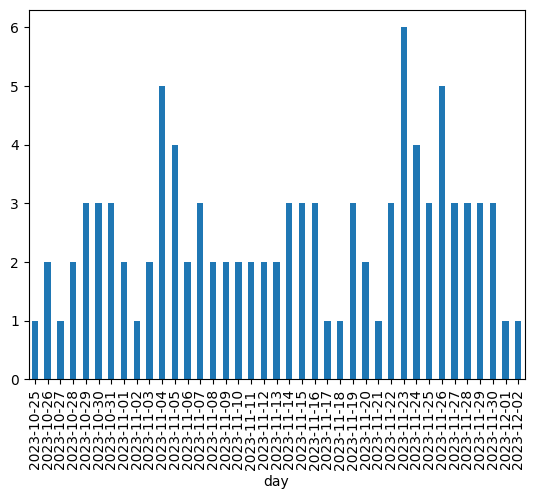

In [601]:
new_df = pd.DataFrame(df, columns=['created_at']) 

# Chuyển đổi cột created_at về định dạng datetime
new_df['created_at'] = pd.to_datetime(new_df['created_at'], errors='coerce', unit='s')

new_df["day"] = new_df["created_at"].dt.date 

resp = new_df.groupby(by=["day"]).count().reset_index().rename(columns={"created_at": "count"})
resp.set_index("day", inplace=True)

print(resp)
resp["count"].plot(kind='bar')
plt.show()

C:\Users\minhduc\AppData\Local\Temp\ipykernel_14812\553836696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', unit='s')
C:\Users\minhduc\AppData\Local\Temp\ipykernel_14812\553836696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day'] = new_df['created_at'].dt.date


<Axes: xlabel='day'>

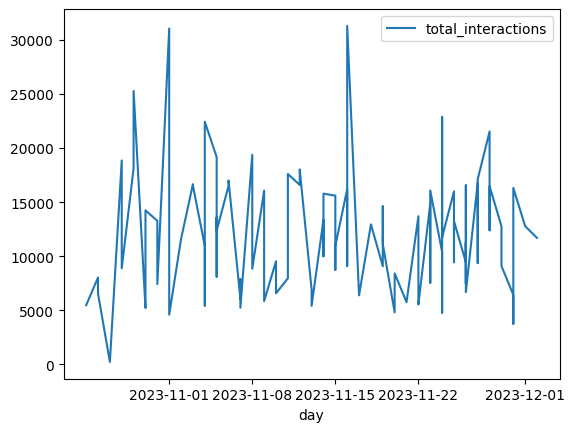

In [602]:
# df.set_index('day')['total_interactions'].plot()
new_df = df[['created_at', 'total_interactions']]

# Chuyển đổi cột created_at về định dạng datetime
new_df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', unit='s')
new_df['day'] = new_df['created_at'].dt.date

new_df = new_df[['day', 'total_interactions']]

new_df.set_index("day", inplace=True)
new_df = new_df.sort_values("day")
new_df.plot()

# Tương quan giữa số lượng tương tác và số bình luận, chia sẻ

In [603]:
df['reactions'] = df['likes'] + df['hahas'] + df['sads'] + df['loves'] + df['wows'] + df['cares'] + df['angries']
correlation = df[['reactions', 'comment_count', 'share_count']].corr()

<Axes: >

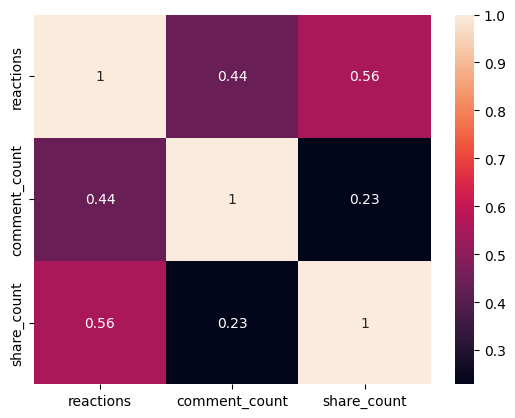

In [604]:
sns.heatmap(correlation, annot=True)

# Mối quan hệ giữa độ dài bài viết và tương tác

In [605]:
df['post_length'] = df['content'].apply(lambda x: len(str(x).split()))

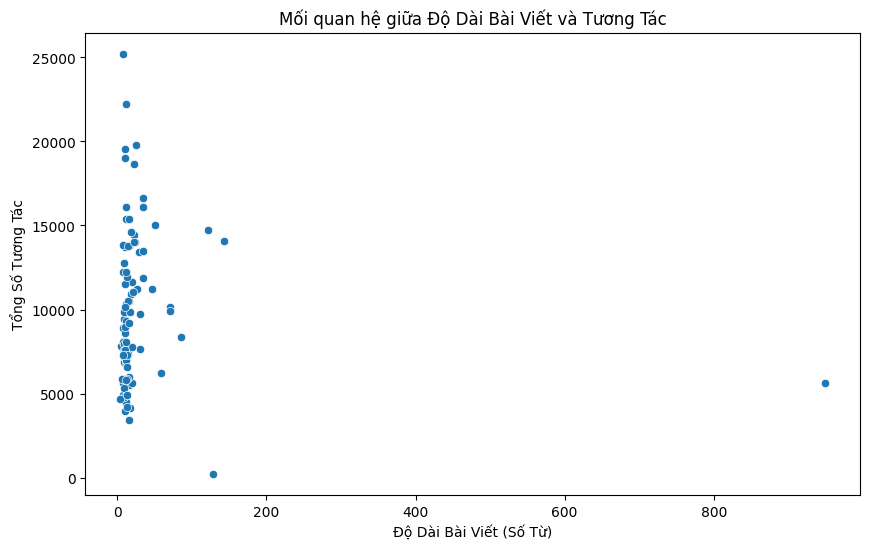

In [606]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='total_reactions')
plt.title('Mối quan hệ giữa Độ Dài Bài Viết và Tương Tác')
plt.xlabel('Độ Dài Bài Viết (Số Từ)')
plt.ylabel('Tổng Số Tương Tác')
plt.show()

# Các hashtags xuất hiện phổ biến


In [607]:
# Hàm trích xuất hashtags
import re
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

In [608]:
# Trích xuất hashtags từ mỗi bài viết
df['hashtags'] = df['content'].dropna().apply(extract_hashtags)
hashtags = str(df['hashtags'])

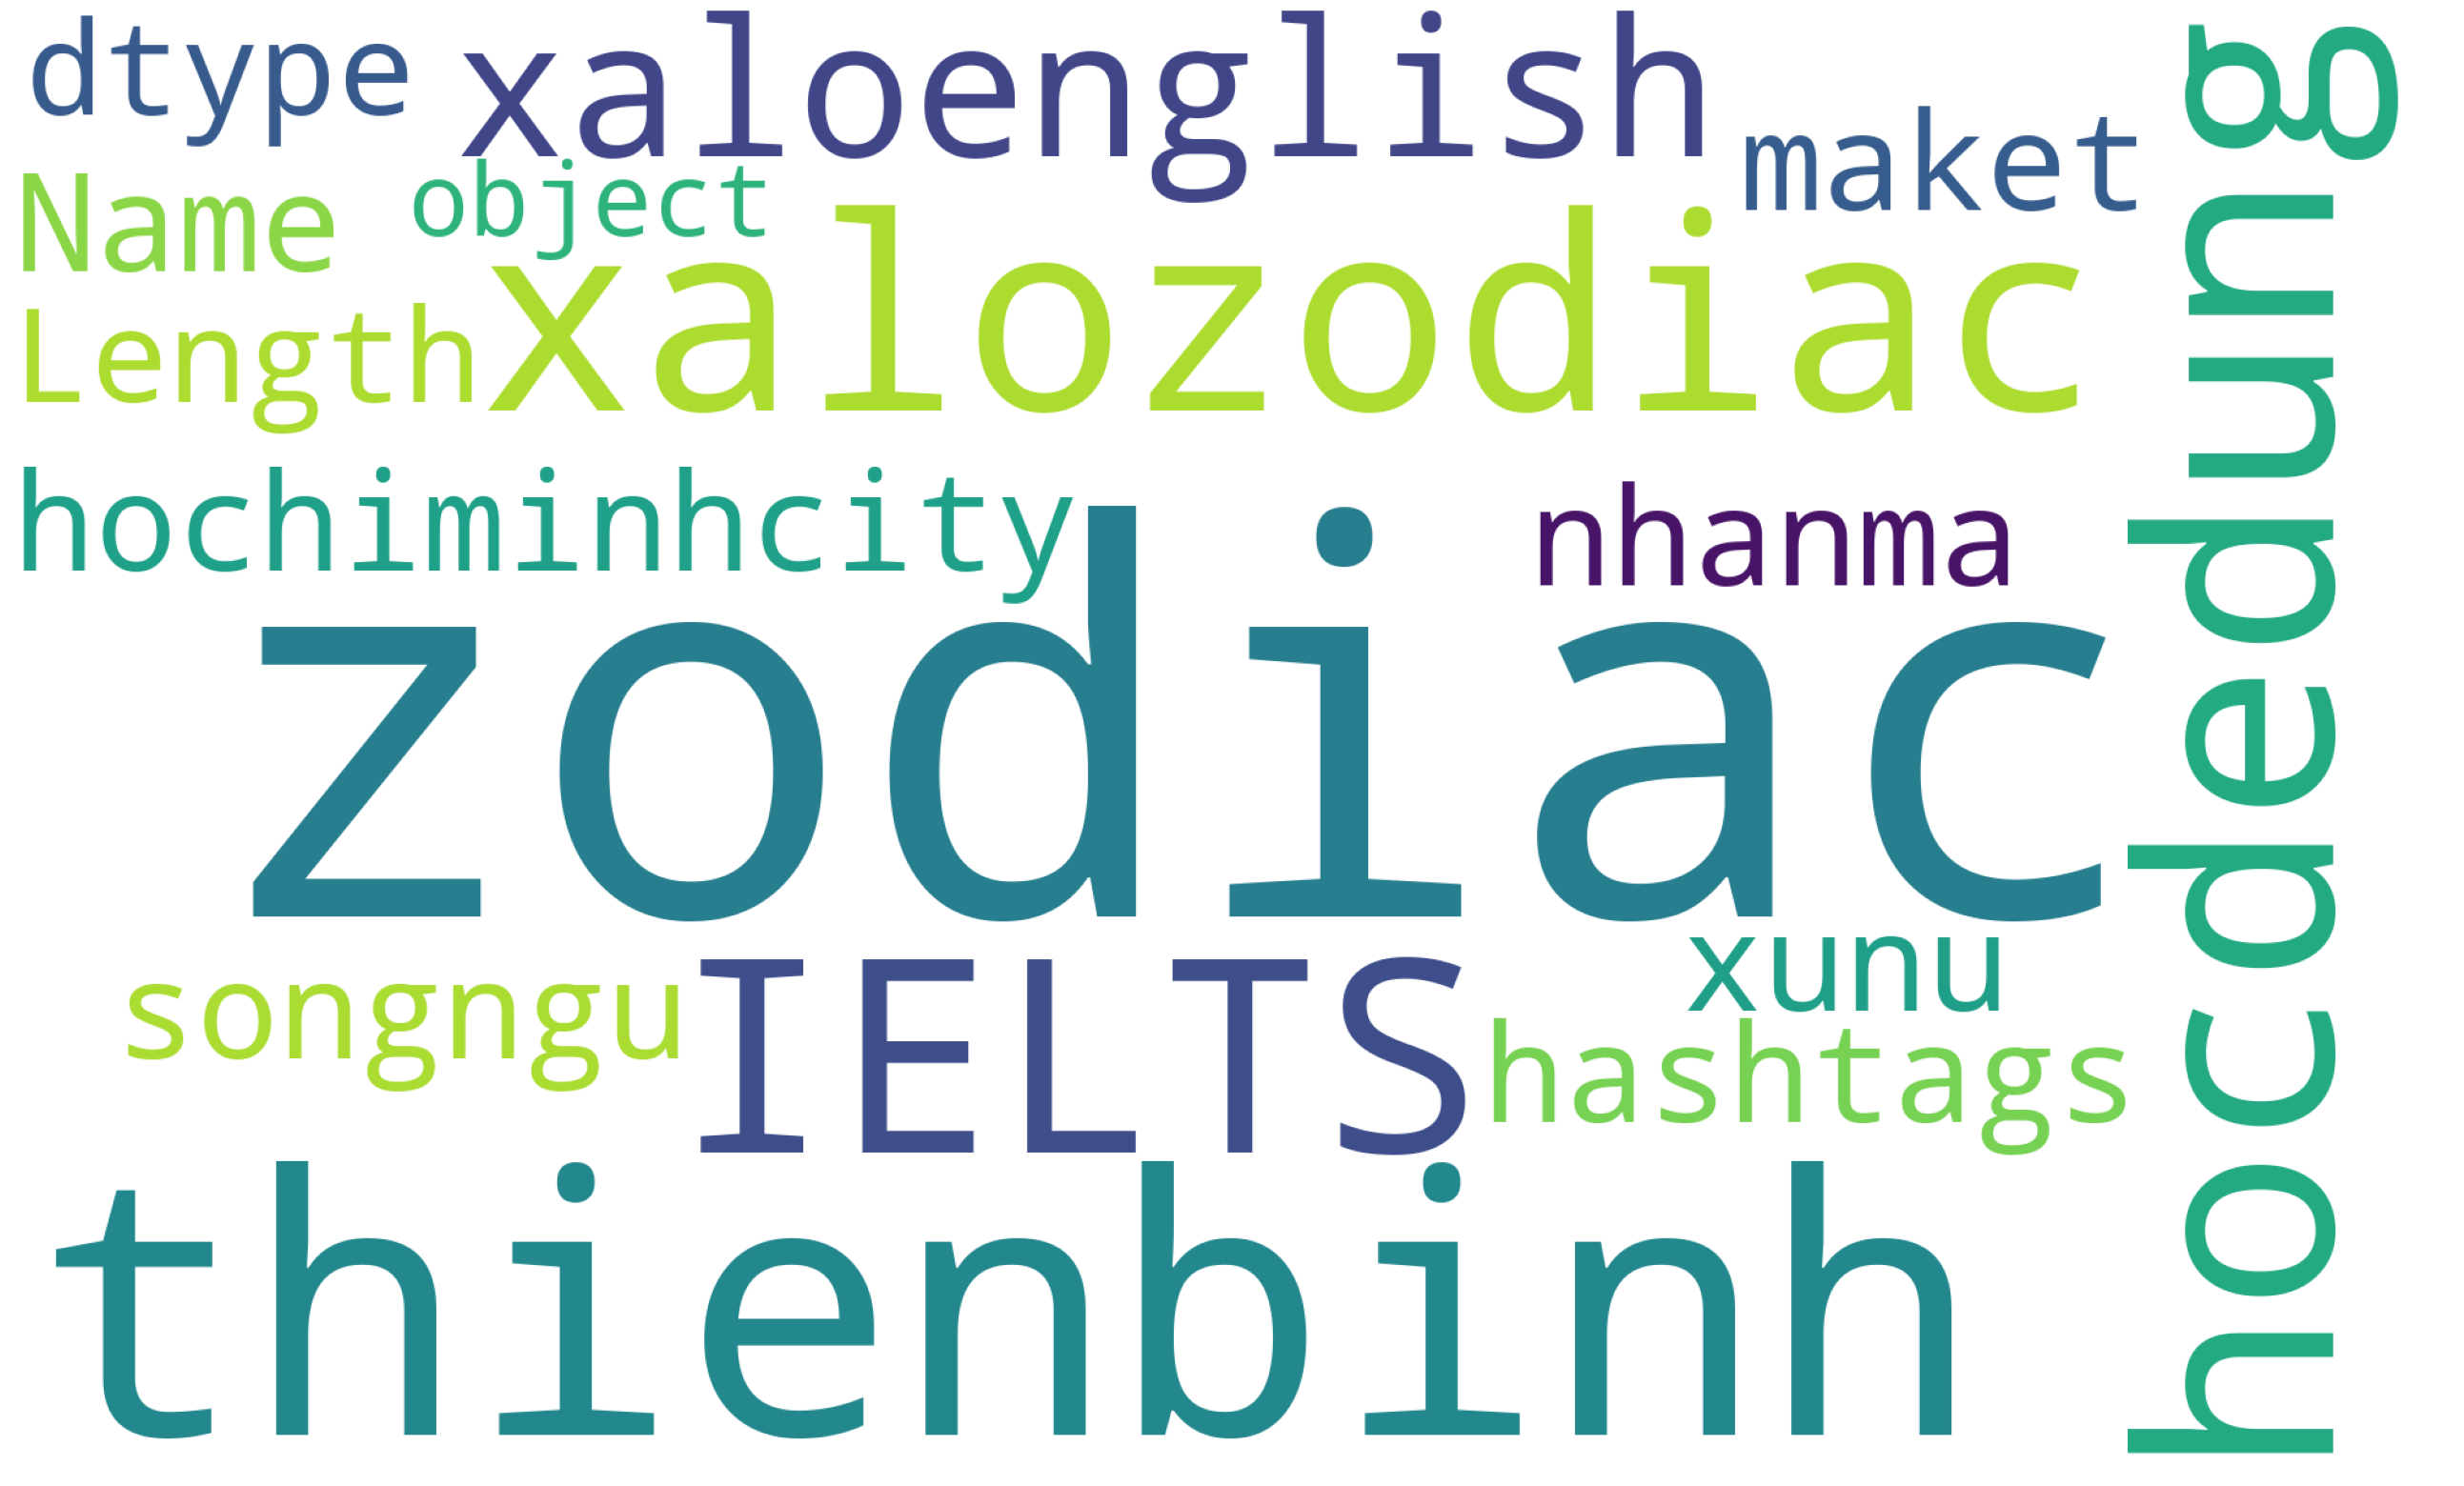

In [609]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      max_words=300, width=2000, height=1200).generate(hashtags)

# Trực quan hóa WordCloud
plt.figure(figsize=(40, 20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Các từ xuất hiện phổ biến

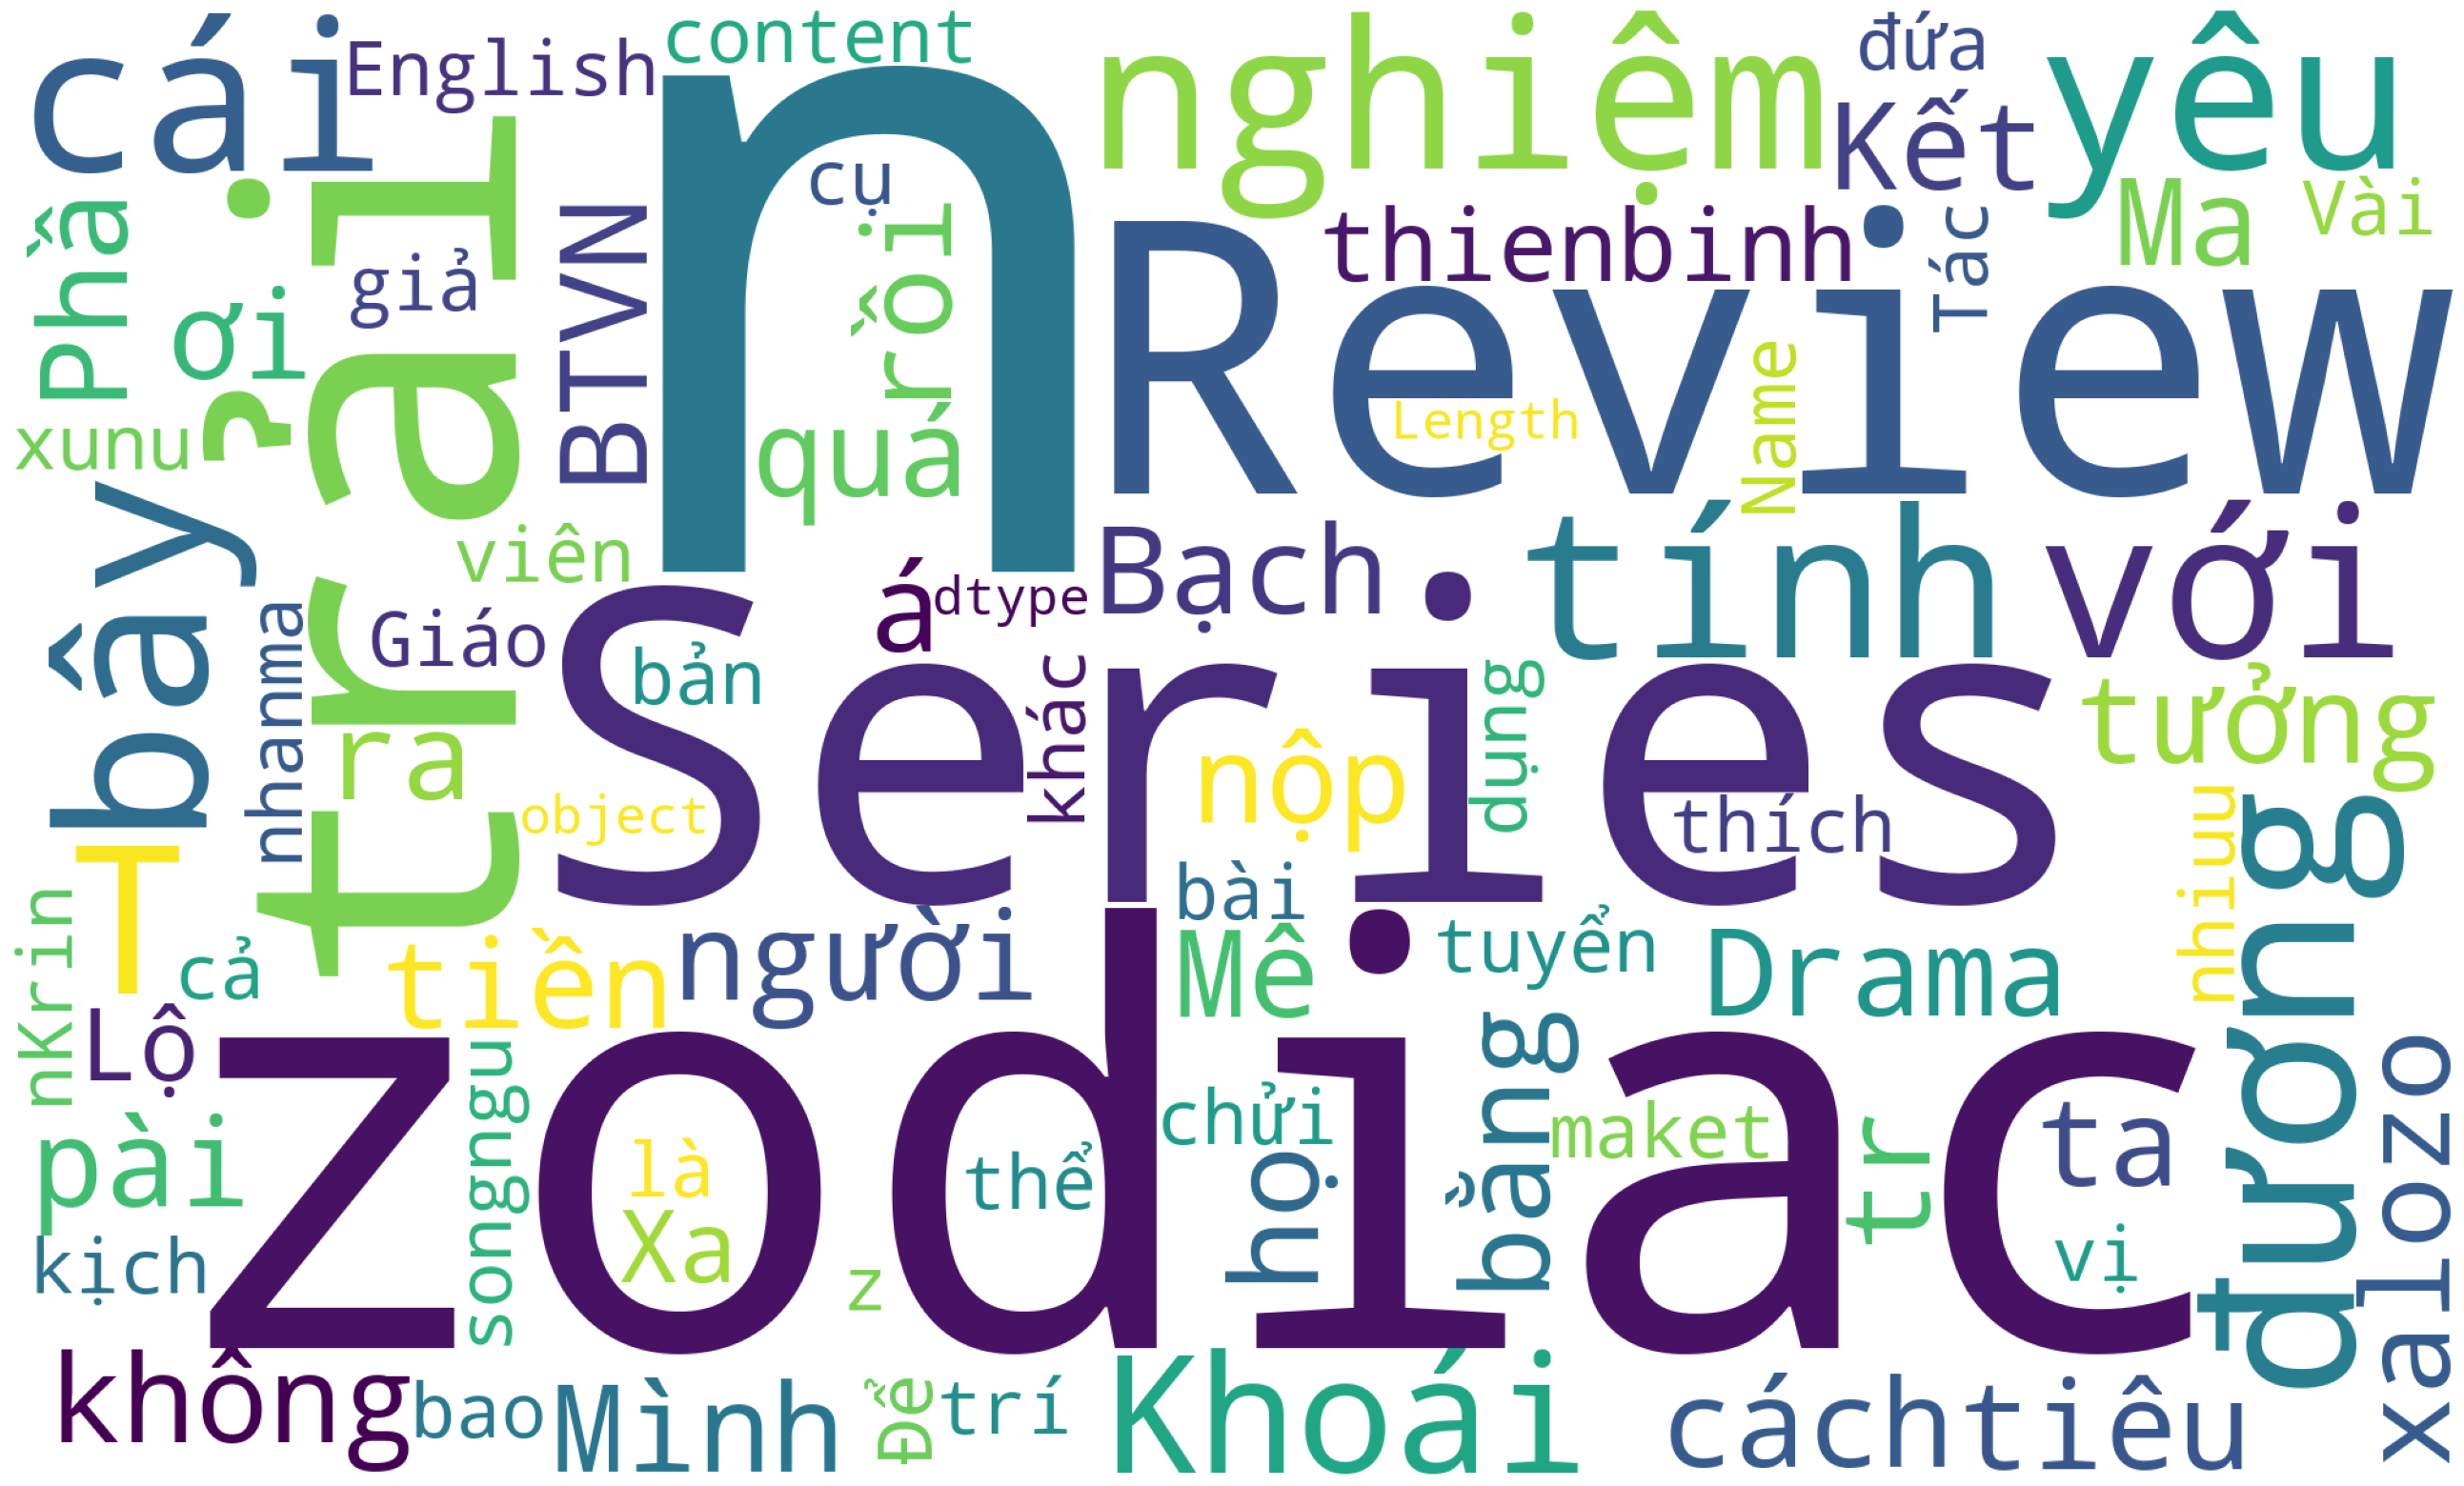

In [610]:
# Tạo đám mây từ cho nội dung bài đăng trên Facebook
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(df["content"]))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [611]:
new_df = pd.DataFrame(df, columns=['created_at']) 

# Chuyển đổi cột created_at về định dạng datetime
new_df['created_at'] = pd.to_datetime(new_df['created_at'], errors='coerce', unit='s')

new_df["day"] = new_df["created_at"].dt.date 
